# Beginner-Friendly competence 
## Roosevelt National Forest Classification
Classify forest types based on information about the area

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/learn-together/test.csv
/kaggle/input/learn-together/train.csv


## Imports

In [2]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

## Load data

In [3]:
train_path = '../input/learn-together/train.csv'
test_path = '../input/learn-together/test.csv'
train_df = pd.read_csv(train_path, index_col='Id')
test_df = pd.read_csv(test_path, index_col='Id')
train_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
test_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
15121,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,0
15122,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,0
15123,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,0
15124,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,0
15125,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,0


## Get the list of categorical variables

In [5]:
# Find if there is any categorical data containing strings
s = (train_df.dtypes =='object')
objects_cols = list(s[s].index)

print('Categorical Variables \n', objects_cols)

Categorical Variables 
 []


This means that all the categories are numeric:

In [6]:
# Print columns name
train_df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [7]:
# Count the number of unique values in each category
num_val = train_df.nunique()
print(num_val)

Elevation                             1665
Aspect                                 361
Slope                                   52
Horizontal_Distance_To_Hydrology       400
Vertical_Distance_To_Hydrology         423
Horizontal_Distance_To_Roadways       3250
Hillshade_9am                          176
Hillshade_Noon                         141
Hillshade_3pm                          247
Horizontal_Distance_To_Fire_Points    2710
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               1
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

### The numeric variables are:
* Elevation - Elevation in meters
* Aspect - Aspect in degrees azimuth
* Slope - Slope in degrees
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
* Horizontal_Distance_To_Fire_Points    5826

### The categorical variables are:
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
* Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

## Data visualization

### First I will plot the Features of the different Cover Types.

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

In [8]:
# Select areas
Type1 = train_df[train_df['Cover_Type']==1].copy()
Type2 = train_df[train_df['Cover_Type']==2].copy()
Type3 = train_df[train_df['Cover_Type']==3].copy()
Type4 = train_df[train_df['Cover_Type']==4].copy()
Type5 = train_df[train_df['Cover_Type']==5].copy()
Type6 = train_df[train_df['Cover_Type']==6].copy()
Type7 = train_df[train_df['Cover_Type']==7].copy()

In [9]:
def histogram_plot_cover_type(feature):
    plt.hist(Type1[feature], bins='auto')
    plt.hist(Type2[feature], bins='auto')
    plt.hist(Type3[feature], bins='auto')
    plt.hist(Type4[feature], bins='auto')
    plt.hist(Type5[feature], bins='auto')
    plt.hist(Type6[feature], bins='auto')
    plt.hist(Type7[feature], bins='auto')
    
    plt.legend(['Type 1', 'Type 2', 'Type 3', 'Type 4', 'Type 5', 'Type 6', 'Type 7'])

Text(0.5, 1.0, 'Histogram for Elevation in different Cover Type')

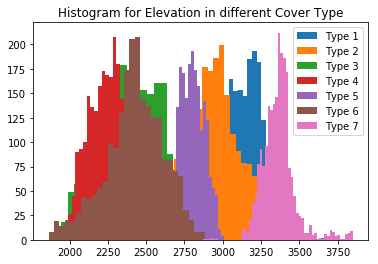

In [10]:
feature1 = 'Elevation'
histogram_plot_cover_type(feature1)

plt.title("Histogram for Elevation in different Cover Type")

Text(0.5, 1.0, 'Histogram for Aspect in different Cover Type')

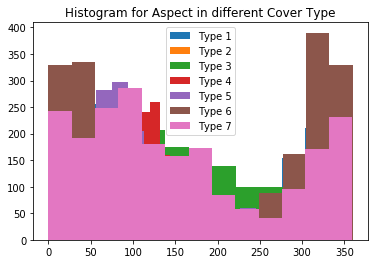

In [11]:
feature1 = 'Aspect'
histogram_plot_cover_type(feature1)

plt.title("Histogram for Aspect in different Cover Type")

Text(0.5, 1.0, 'Histogram for Slope in different Cover Type')

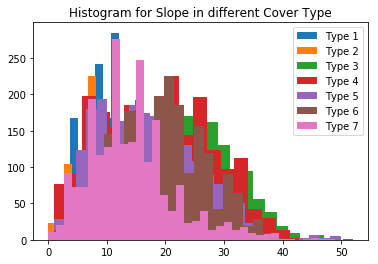

In [12]:
feature1 = 'Slope'
histogram_plot_cover_type(feature1)

plt.title("Histogram for Slope in different Cover Type")

Text(0.5, 1.0, 'Histogram for Horizontal_Distance_To_Hydrology in different Cover Type')

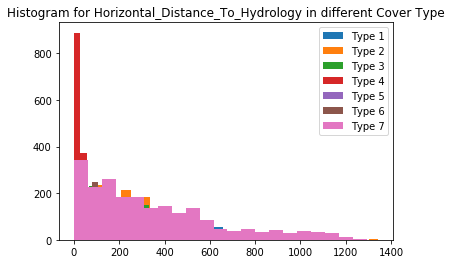

In [13]:
feature1 = 'Horizontal_Distance_To_Hydrology'
histogram_plot_cover_type(feature1)

plt.title("Histogram for Horizontal_Distance_To_Hydrology in different Cover Type")

* ### Here I plot the different features for Wilderness areas.

The wilderness areas are:

1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area

In [14]:
# Select areas
Area1 = train_df[train_df['Wilderness_Area1']==1].copy()
Area2 = train_df[train_df['Wilderness_Area2']==1].copy()
Area3 = train_df[train_df['Wilderness_Area3']==1].copy()
Area4 = train_df[train_df['Wilderness_Area4']==1].copy()

In [15]:
def histogram_plot(feature):
    plt.hist(Area1[feature], bins='auto')
    plt.hist(Area2[feature], bins='auto')
    plt.hist(Area3[feature], bins='auto')
    plt.hist(Area4[feature], bins='auto')

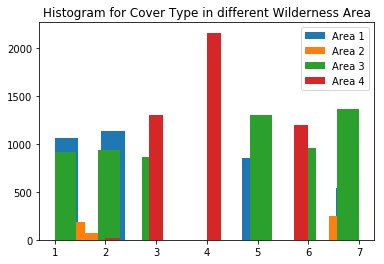

In [16]:
feature1 = 'Cover_Type'
histogram_plot(feature1)


plt.title("Histogram for Cover Type in different Wilderness Area")
plt.legend(['Area 1', 'Area 2', 'Area 3', 'Area 4'])

### Elevation is an important parameter
Low elevations will be in Area 4

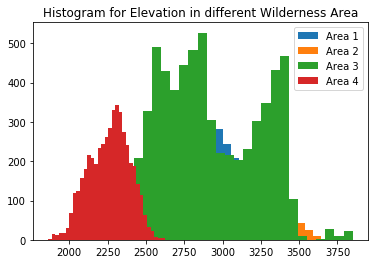

In [17]:
feature1 = 'Elevation'
histogram_plot(feature1)


plt.title("Histogram for Elevation in different Wilderness Area")
plt.legend(['Area 1', 'Area 2', 'Area 3', 'Area 4'])

### Effect of Aspect

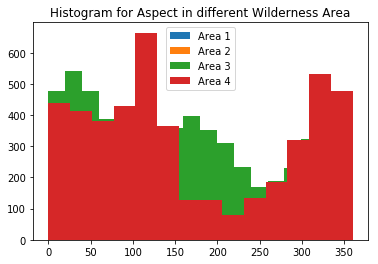

In [18]:
feature2 = 'Aspect'
histogram_plot(feature2)

plt.title("Histogram for Aspect in different Wilderness Area")
plt.legend(['Area 1', 'Area 2', 'Area 3', 'Area 4'])

### Effect of Slope


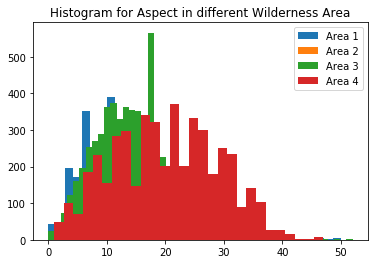

In [19]:
feature3 = 'Slope'
histogram_plot(feature3)
plt.title("Histogram for Aspect in different Wilderness Area")
plt.legend(['Area 1', 'Area 2', 'Area 3', 'Area 4'])

### Effect of Horizontal Distance To Hydrology


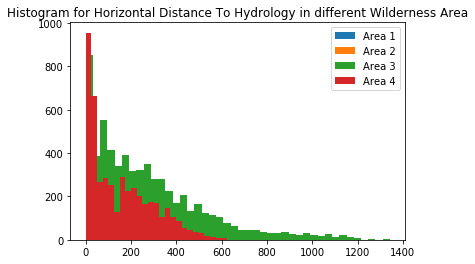

In [20]:
feature4 = 'Horizontal_Distance_To_Hydrology'
histogram_plot(feature4)
plt.title("Histogram for Horizontal Distance To Hydrology in different Wilderness Area")
plt.legend(['Area 1', 'Area 2', 'Area 3', 'Area 4'])

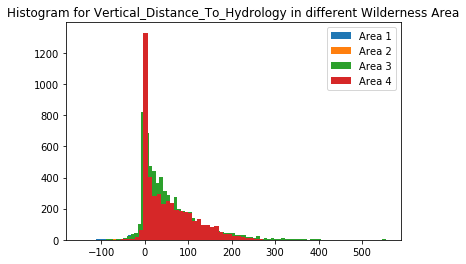

In [21]:
feature5 = 'Vertical_Distance_To_Hydrology'
histogram_plot(feature5)
plt.title("Histogram for Vertical_Distance_To_Hydrology in different Wilderness Area")
plt.legend(['Area 1', 'Area 2', 'Area 3', 'Area 4'])

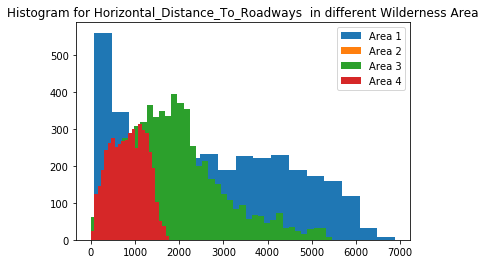

In [22]:
feature6 = 'Horizontal_Distance_To_Roadways'
histogram_plot(feature6)
plt.title("Histogram for Horizontal_Distance_To_Roadways  in different Wilderness Area")
plt.legend(['Area 1', 'Area 2', 'Area 3', 'Area 4'])

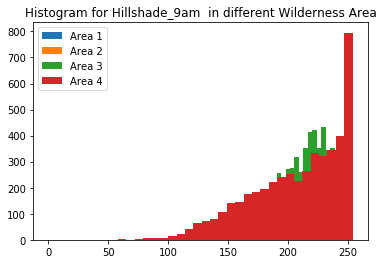

In [23]:
feature7 = 'Hillshade_9am'
histogram_plot(feature7)
plt.title("Histogram for Hillshade_9am  in different Wilderness Area")
plt.legend(['Area 1', 'Area 2', 'Area 3', 'Area 4'])

## Ramdom Forest Classifier

### Objective:
I am interested predict an integer classification for the forest cover type.

In [24]:
numerical_cols= ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']
categorical_cols = ['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']

Obj_type ='Cover_Type'

In [25]:
features = [numerical_cols[:], categorical_cols[:]]

y_train = train_df['Cover_Type']
X_train = train_df[features[0]] 
X_test = test_df[features[0]]

In [26]:
model = RandomForestClassifier(n_estimators=100)

#my_pipeline = Pipeline(steps=[('model', model) ])

# Preprocessing of training data, fit model 
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
# Preprocessing of validation data, get predictions
preds = model.predict(X_test)
print(preds)

[5 5 2 ... 6 6 6]


# Output

In [28]:
test_ids = test_df.index

output = pd.DataFrame({'Id': test_ids,
                       'Category': preds})
output.to_csv('submission.csv', index=False)

output.head()


/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

,Id,Category
0,15121,5
1,15122,5
2,15123,2
3,15124,2
4,15125,2
